## 參考連結

- 有無參考他人之實驗結果：有
- 參考連結：
* [鐵達尼生存預測 - 手把手資料分析實戰教學](https://aifreeblog.herokuapp.com/posts/64/Data_Analytics_in_Practice_Titanic/)
* [Kaggle-DT-RF](https://www.kaggle.com/yuyingg0921/dt-rf?fbclid=IwAR3G6JCdDcCi6egLdCpMt0yJ67vyOGQBGargjkKryuSvm0n1ZdtAWTTRPlE)

## Tip1.1載入分析過程中所需要的套件
*  ggplot是資料視覺化的資料包 -[參考](https://yijutseng.github.io/DataScienceRBook/vis.html)

In [33]:
import pandas as pd
import numpy as np

# 繪圖相關套件
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use( 'ggplot' ) 

# 標籤編碼(Label)、獨熱編碼(OneHot)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
# 決策樹(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
# 隨機森林(Random Forest)
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
import warnings
warnings.filterwarnings( 'ignore' )
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2021-05-03 21:02:01 +08:00)


# Tip1.2下載資料從Kaggle，匯入資料

* 因為使用jupyter notebook,載到本地端進行操作
* 由以下圖片可以知道訓練集有891筆資料、12個特徵欄位
* 測試集有418筆資料、11個特徵欄位
* 測試集與訓練集的差別是訓練集多了是否存活(survived)欄位
* [print(f'')的意思](https://stackoverflow.com/questions/57150426/what-is-printf)

In [4]:
df_train = pd.read_csv('C:/train.csv')
df_test = pd.read_csv('C:/test.csv')
submit = pd.read_csv('C:/gender_submission.csv')

print( f'train {df_train.shape}' )
display( df_train.head() )

print( f'\ntest {df_test.shape}' )
display( df_test.head() )
%load_ext autotime

train (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



test (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 703 ms (started: 2021-05-03 20:52:33 +08:00)


#  Tip1.3 定義函數來判斷欄位型態
* 下圖可以看到7個數值型態，另外5個為非數值型態

In [5]:
# 定義判別欄位型態的函數
def Col_Types( Data ):
    Column_Types = Data.dtypes.to_frame().reset_index()   # 判別每個欄位的型態 
    Column_Types.columns = ['ColumnName','Type']
    Column_Types.sort_values( by='Type', inplace=True ) 
    return Column_Types
display( Col_Types(df_train) )
%load_ext autotime

,ColumnName,Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
6,SibSp,int64
7,Parch,int64
5,Age,float64
9,Fare,float64
3,Name,object
4,Sex,object
8,Ticket,object


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 31 ms (started: 2021-05-03 20:52:34 +08:00)


# Tip1.4 計算缺漏值
* 由圖中可以知道分別是Age、Cabin、Embarked有缺漏，其中又以Cabin缺漏最嚴重
* 在測試集有Fare有缺漏

In [6]:
a=df_train.isnull().sum()
b=df_test.isnull().sum()
print('train')
print(a,'\n')
print('test')
print(b)
%load_ext autotime

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 172 ms (started: 2021-05-03 20:52:34 +08:00)


# Tip1.5用統計來判斷每個欄位尺度是否相似
* 可以用來是否需要進行資料正歸化

In [7]:
print( 'train' )
display( df_train.describe() )

print( 'test' )
display( df_test.describe() )
%load_ext autotime

train


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


test


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 391 ms (started: 2021-05-03 20:52:34 +08:00)


In [8]:
# 合併train及test的資料 
df_data = df_train.append( df_test )
df_data
%load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 15 ms (started: 2021-05-03 20:52:34 +08:00)


# Tip1.6用圓餅圖來表示生還者比例

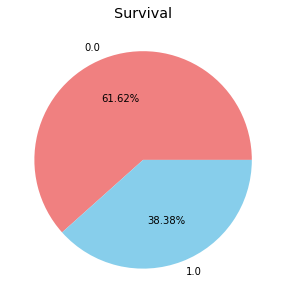

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 704 ms (started: 2021-05-03 20:52:34 +08:00)


In [9]:
Survived_Counts = df_data['Survived'].value_counts().reset_index()
Survived_Counts.columns = ['Survived','Counts']
Survived_Counts
plt.figure( figsize=(10,5) )
df_data['Survived'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Survival' )  # 圖標題
plt.ylabel( '' )
plt.show()
%load_ext autotime


# Tip1.7用相關係數欄位來分析各特徵之間的關係
* **由下圖可以知道PassengerID與其他是沒有呈現線性關係**

In [10]:
# Survied 與其他欄位間的相關係數
Corr_Matrix = df_train.corr()  # 計算相關係數
Corr_age = Corr_Matrix.loc['Age',:].sort_values()[:-1]
Corr_age = pd.DataFrame({ 'Age':Corr_age })

Corr_sur = Corr_Matrix.loc['Survived',:].sort_values()[:-1]
Corr_sur = pd.DataFrame({ 'Survived':Corr_sur })

Corr_fare = Corr_Matrix.loc['Fare',:].sort_values()[:-1]
Corr_fare = pd.DataFrame({ 'Fare':Corr_fare })
#frames = [Corr_age, Corr_sur, axis=1]

Corr_parch = Corr_Matrix.loc['Parch',:].sort_values()[:-1]
Corr_parch = pd.DataFrame({ 'Parch':Corr_parch })

Corr_pass = Corr_Matrix.loc['PassengerId',:].sort_values()[:-1]
Corr_pass = pd.DataFrame({ 'PassengerId':Corr_pass })

Corr_pclass = Corr_Matrix.loc['Pclass',:].sort_values()[:-1]
Corr_pclass = pd.DataFrame({ 'Pclass':Corr_pclass })

Corr_sib = Corr_Matrix.loc['SibSp',:].sort_values()[:-1]
Corr_sib = pd.DataFrame({ 'SibSp':Corr_sib})

result = pd.concat([Corr_age, Corr_fare,Corr_parch,Corr_pass,Corr_pclass,Corr_sib,Corr_sur], axis=1)
result
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 46 ms (started: 2021-05-03 20:52:35 +08:00)


# Tip1.8生存率來判斷特徵之間的關係

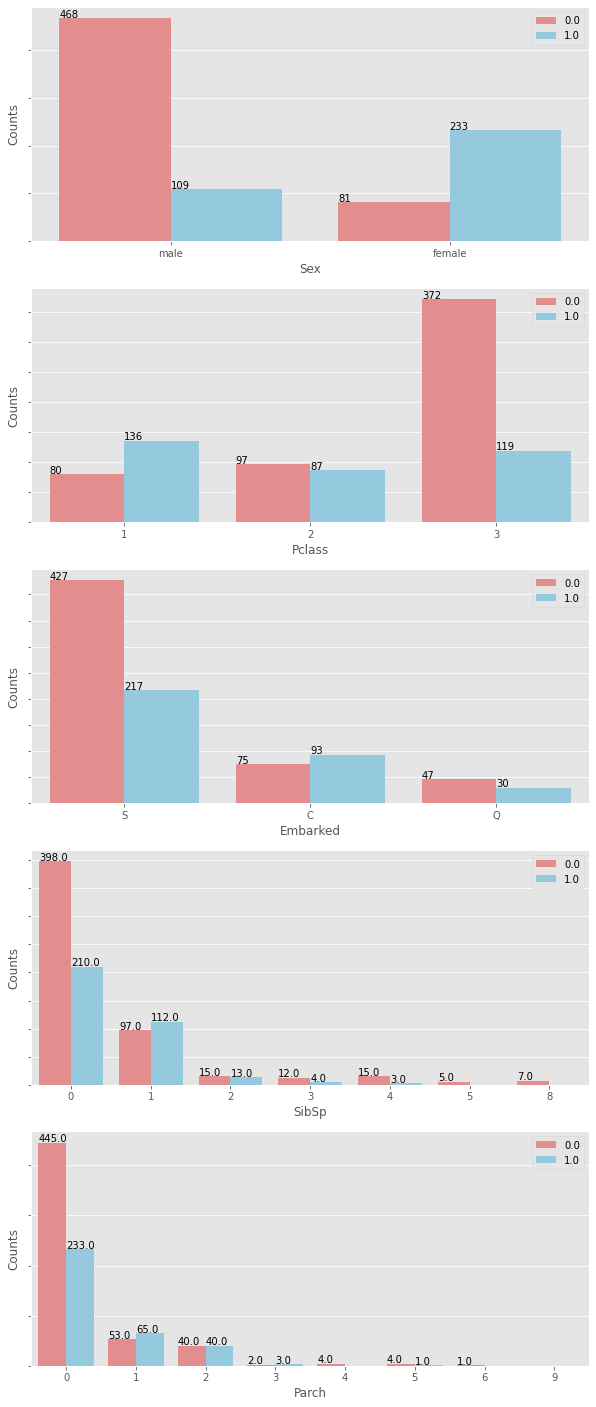

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.17 s (started: 2021-05-03 20:52:35 +08:00)


In [11]:
# Sex性別、Pclass票務艙、Embarked登船港口、SibSp兄弟姊妹配偶人數、Parch父母子女人數
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']

plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df_data[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( df_data[col], hue=df_data.Survived, palette=['lightcoral','skyblue'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )   # upper right:1 ; upper left:2
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()
%load_ext autotime

# 上圖分析
* 女性生存率高於男性
* 票務艙中 一等艙(圖中的1)>二等艙(圖中的2)>三等艙(圖中的3)

In [12]:
for col in selected_cols:
    l = ['Survived']
    l.append(col) 
    Survival_Rate = df_data[l].groupby(by=col).mean().round(4).reset_index()
    Survival_Rate.columns = [col,'Survival Rate(%)']
    Survival_Rate['Survival Rate(%)'] = Survival_Rate['Survival Rate(%)'].map( lambda x:x*100 )
    display( Survival_Rate )
    
%load_ext autotime

,Sex,Survival Rate(%)
0,female,74.20
1,male,18.89


,Pclass,Survival Rate(%)
0,1,62.96
1,2,47.28
2,3,24.24


,Embarked,Survival Rate(%)
0,C,55.36
1,Q,38.96
2,S,33.70


,SibSp,Survival Rate(%)
0,0,34.54
1,1,53.59
2,2,46.43
3,3,25.00
4,4,16.67
5,5,0.00
6,8,0.00


,Parch,Survival Rate(%)
0,0,34.37
1,1,55.08
2,2,50.00
3,3,60.00
4,4,0.00
5,5,20.00
6,6,0.00
7,9,NaN


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 422 ms (started: 2021-05-03 20:52:36 +08:00)


# 上圖分析
* 登陸港口以C生存率最高
* SibSp(兄弟姊妹配偶人數)有1人同行時，生存機率較高
* parch(父母子女人數)有 1 ~ 3 個人時，生存機率較高

# Tip1.9合併SibSP與Parch代表新的特徵 家庭人數
* **下圖很明顯看出家庭人數達4人時 生存機率最高**

In [13]:
# 創造新的特徵變數：家庭人數(Family_Size)
df_data['Family_Size'] = df_data['SibSp'] + df_data['Parch'] + 1
%load_ext autotime
Survival_Rate = df_data[['Family_Size','Survived']].groupby(by=['Family_Size']).agg(np.mean)*100
Survival_Rate.columns = ['Survival Rate(%)']
Survival_Rate.reset_index()


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


,Family_Size,Survival Rate(%)
0,1,30.353818
1,2,55.279503
2,3,57.843137
3,4,72.413793
4,5,20.000000
5,6,13.636364
6,7,33.333333
7,8,0.000000
8,11,0.000000


time: 312 ms (started: 2021-05-03 20:52:37 +08:00)


# Tip1.10把家庭人數生存機率分等級 

In [14]:
df_data[ 'Family_Class' ] = np.nan
%load_ext autotime
df_data.loc[ df_data.Family_Size==0, 'Family_Class' ] = 2
df_data.loc[ (df_data.Family_Size>=1) & (df_data.Family_Size<=3), 'Family_Class' ] = 3
df_data.loc[ (df_data.Family_Size>=4) & (df_data.Family_Size<=6), 'Family_Class' ] = 2
df_data.loc[ (df_data.Family_Size>=7), 'Family_Class' ] = 1


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 94 ms (started: 2021-05-03 20:52:37 +08:00)


# Tip1.11分析每個艙等的男女生存率
* **可以明顯看出一等艙的女性生存率最高**

In [15]:
# Sex & Pclass 
Survival_Rate = df_data[['Sex','Pclass','Survived']].groupby(by=['Sex','Pclass']).agg(np.mean)*100
Survival_Rate.columns = ['Survival Rate(%)']

%load_ext autotime
Survival_Rate.reset_index()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


,Sex,Pclass,Survival Rate(%)
0,female,1,96.808511
1,female,2,92.105263
2,female,3,50.000000
3,male,1,36.885246
4,male,2,15.740741
5,male,3,13.544669


time: 188 ms (started: 2021-05-03 20:52:37 +08:00)


In [16]:
df_data[ 'Sex_Pclass' ] = np.nan
df_data.loc[ (df_data.Sex=='female') & (df_data.Pclass==1), 'Sex_Pclass' ] = 2
df_data.loc[ (df_data.Sex=='female') & (df_data.Pclass==2), 'Sex_Pclass' ] = 3
df_data.loc[ (df_data.Sex=='female') & (df_data.Pclass==3), 'Sex_Pclass' ] = 3
df_data.loc[ (df_data.Sex=='male') & (df_data.Pclass==1), 'Sex_Pclass' ] = 1
df_data.loc[ (df_data.Sex=='male') & (df_data.Pclass==2), 'Sex_Pclass' ] = 1
df_data.loc[ (df_data.Sex=='male') & (df_data.Pclass==3), 'Sex_Pclass' ] = 2

time: 78 ms (started: 2021-05-03 20:52:37 +08:00)


# 2.1處理缺漏值以及沒有意義的特徵值
* **把Name以及Ticket去掉**
* **Before : 保有PassengerID Ticket較沒有關係的特徵值**
* **After : 刪去後的輸出**

In [17]:

%load_ext autotime
display(df_data.head())

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Class,Sex_Pclass
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,3.0,2.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,3.0,2.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,3.0,3.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,3.0,2.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,3.0,2.0


time: 157 ms (started: 2021-05-03 20:52:37 +08:00)


In [18]:
%load_ext autotime
df_data.drop(['PassengerId','Ticket'],axis=1)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Family_Size,Family_Class,Sex_Pclass
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,2,3.0,2.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,2,3.0,2.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,1,3.0,3.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,2,3.0,2.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,1,3.0,2.0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,1,3.0,2.0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,1,3.0,1.0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,5,2.0,2.0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,3,3.0,3.0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1.0,2,3.0,3.0


time: 125 ms (started: 2021-05-03 20:52:37 +08:00)


# Tip2.1.5 將姓名中的稱謂取出來
* 可以猜測 有地位有稱謂的人員可能與生存機率相關

In [19]:
%load_ext autotime
# Method 1: split()
df_data['Title'] = df_data.Name.str.split(', ', expand=True)[1]
df_data['Title'] = df_data.Title.str.split('.', expand=True)[0]
df_data['Title'].unique()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

time: 94 ms (started: 2021-05-03 20:52:38 +08:00)


In [20]:
%load_ext autotime
df_data['Title'] = df_data.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare' )
df_data['Title'] = df_data.Title.replace( ['Ms','Mlle'], 'Miss' )
df_data['Title'] = df_data.Title.replace( 'Mme', 'Mrs' )
df_data['Title'].unique()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'the Countess'],
      dtype=object)

time: 187 ms (started: 2021-05-03 20:52:38 +08:00)


In [21]:
%load_ext autotime
df_data.drop(['Name'],axis=1)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Class,Sex_Pclass,Title
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,A/5 21171,2,3.0,2.0,Mr
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,2,3.0,2.0,Mrs
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,1,3.0,3.0,Miss
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,2,3.0,2.0,Mrs
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,373450,1,3.0,2.0,Mr
5,NaN,NaN,Q,8.4583,0,6,3,male,0,0.0,330877,1,3.0,2.0,Mr
6,54.0,E46,S,51.8625,0,7,1,male,0,0.0,17463,1,3.0,1.0,Mr
7,2.0,NaN,S,21.0750,1,8,3,male,3,0.0,349909,5,2.0,2.0,Master
8,27.0,NaN,S,11.1333,2,9,3,female,0,1.0,347742,3,3.0,3.0,Mrs
9,14.0,NaN,C,30.0708,0,10,2,female,1,1.0,237736,2,3.0,3.0,Mrs


time: 172 ms (started: 2021-05-03 20:52:38 +08:00)


In [22]:
%reload_ext autotime
df_data.drop(['Name'],axis=1)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Class,Sex_Pclass,Title
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,A/5 21171,2,3.0,2.0,Mr
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,2,3.0,2.0,Mrs
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,1,3.0,3.0,Miss
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,2,3.0,2.0,Mrs
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,373450,1,3.0,2.0,Mr
5,NaN,NaN,Q,8.4583,0,6,3,male,0,0.0,330877,1,3.0,2.0,Mr
6,54.0,E46,S,51.8625,0,7,1,male,0,0.0,17463,1,3.0,1.0,Mr
7,2.0,NaN,S,21.0750,1,8,3,male,3,0.0,349909,5,2.0,2.0,Master
8,27.0,NaN,S,11.1333,2,9,3,female,0,1.0,347742,3,3.0,3.0,Mrs
9,14.0,NaN,C,30.0708,0,10,2,female,1,1.0,237736,2,3.0,3.0,Mrs


time: 94 ms (started: 2021-05-03 20:52:38 +08:00)


In [23]:
%reload_ext autotime
# 新增標註 Age 欄位是否為缺漏值的欄位(有缺漏標為0)
df_data['isAge'] = df_data['Age'].isnull().map( lambda x:0 if x==True else 1 )

time: 0 ns (started: 2021-05-03 20:52:38 +08:00)


In [24]:
%reload_ext autotime
# 分別觀察 Age 與 Sex、Pclass 的缺漏值分布狀況
display( pd.crosstab( df_data.isAge, df_data.Sex, margins=True ) )
display( pd.crosstab( df_data.isAge, df_data.Pclass, margins=True ) )

Sex,female,male,All
isAge,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


Pclass,1,2,3,All
isAge,,,,
0,39,16,208,263
1,284,261,501,1046
All,323,277,709,1309


time: 281 ms (started: 2021-05-03 20:52:38 +08:00)


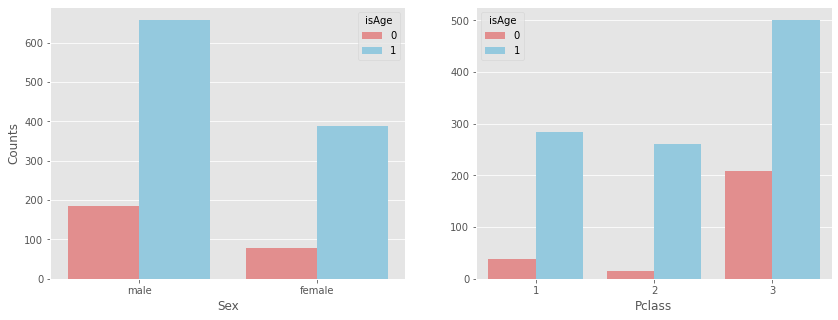

time: 266 ms (started: 2021-05-03 20:52:39 +08:00)


In [25]:
%reload_ext autotime
fig, axs = plt.subplots(1,2,figsize=(14,5))
#plt.suptitle('Age')

plt.subplot(1,2,1)
sns.countplot( df_data.Sex, hue=df_data.isAge, palette=['lightcoral','skyblue'] )
plt.ylabel( 'Counts' ) 

plt.subplot(1,2,2)
sns.countplot( df_data.Pclass, hue=df_data.isAge, palette=['lightcoral','skyblue'] )
plt.ylabel( '' ) 

plt.show()

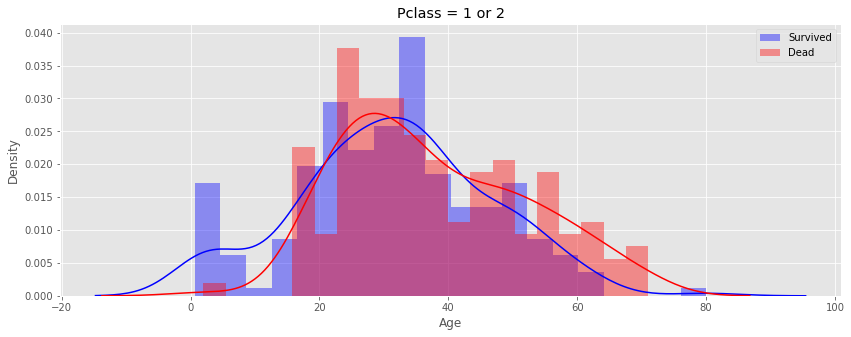

time: 500 ms (started: 2021-05-03 20:52:39 +08:00)


In [26]:
%reload_ext autotime
index_S = (df_data.isAge==1)&(df_data.Pclass!=3)&(df_data.Survived==1)
index_D = (df_data.isAge==1)&(df_data.Pclass!=3)&(df_data.Survived==0)

plt.figure( figsize=(14,5) )
sns.distplot( df_data.loc[index_S,'Age'], bins=20, color='blue', label='Survived' )
sns.distplot( df_data.loc[index_D,'Age'], bins=20, color='red', label='Dead' )
plt.title( 'Pclass = 1 or 2' )
plt.legend( )
plt.show( )

In [27]:
%reload_ext autotime
# 計算每個 Title 的年齡平均值及中位數
Age_Mean = df_data[['Title','Age']].groupby( by=['Title'] ).mean()
Age_Median = df_data[['Title','Age']].groupby( by=['Title'] ).median()

Age_Mean.columns = ['Age Mean']
Age_Median.columns = ['Age Median']
Age_Mean.reset_index( inplace=True )
Age_Median.reset_index( inplace=True )

display( Age_Median )
display( Age_Mean )

,Title,Age Median
0,Master,4.0
1,Miss,22.0
2,Mr,29.0
3,Mrs,35.0
4,Rare,48.0
5,the Countess,33.0


,Title,Age Mean
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Rare,45.629630
5,the Countess,33.000000


time: 31 ms (started: 2021-05-03 20:52:39 +08:00)


In [28]:
%reload_ext autotime
# 利用每個 Title 的年齡平均數，填補每個 Title 所對應 Age 的缺漏值
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Master'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Master','Age Mean'][0]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Miss'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Miss','Age Mean'][1]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mr'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mr','Age Mean'][2]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mrs'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mrs','Age Mean'][3]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Rare'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Rare','Age Mean'][4]

# 刪除 isAge 欄位 
df_data.drop( 'isAge', axis=1, inplace=True )

time: 32 ms (started: 2021-05-03 20:52:40 +08:00)


In [51]:
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count

time: 15 ms (started: 2021-05-03 21:14:32 +08:00)


# Tip2.2觀察缺漏值分布情形

In [53]:
Missing_Counts(df_data.drop('Survived',axis=1))

,ColumnName,MissingCount,Percentage(%)


time: 16 ms (started: 2021-05-03 21:14:35 +08:00)


# Tip2.3用中位數填補整體票價(Fare)

In [54]:
%reload_ext autotime
df_data['Fare'].fillna( df_data.Fare.median(), inplace=True )

time: 0 ns (started: 2021-05-03 21:14:36 +08:00)


# Tip2.4用眾數(最多的港口)填補缺漏值

In [55]:
display(df_data['Embarked'].value_counts())
df_data['Embarked'].fillna('S',inplace=True)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

time: 15 ms (started: 2021-05-03 21:14:37 +08:00)


# Tip2.5船艙號碼(Cabin)填補

In [56]:
%reload_ext autotime
# 觀察 Cabin 中的種類
df_data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

time: 0 ns (started: 2021-05-03 21:14:38 +08:00)


In [57]:
%reload_ext autotime
# 取出 Cabin 中的第一個字母，如果為缺漏值，則以 NoCabin 表示
df_data['Cabin'] = df_data['Cabin'].apply( lambda x:str(x)[0] if not pd.isnull(x) else 'NoCabin' )
df_data['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

time: 15 ms (started: 2021-05-03 21:14:38 +08:00)


# Tip2.6確認一下還有沒有缺漏值

In [58]:
%reload_ext autotime
Missing_Counts( df_data.drop('Survived', axis=1) )


,ColumnName,MissingCount,Percentage(%)


time: 15 ms (started: 2021-05-03 21:14:40 +08:00)


In [59]:
df_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Class,Sex_Pclass,Title
0,22.000000,N,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,3.0,2.0,Mr
1,38.000000,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,3.0,2.0,Mrs
2,26.000000,N,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,3.0,3.0,Miss
3,35.000000,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,3.0,2.0,Mrs
4,35.000000,N,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,3.0,2.0,Mr
5,32.252151,N,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,1,3.0,2.0,Mr
6,54.000000,E,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,1,3.0,1.0,Mr
7,2.000000,N,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,5,2.0,2.0,Master
8,27.000000,N,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,3,3.0,3.0,Mrs
9,14.000000,N,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,2,3.0,3.0,Mrs


time: 62 ms (started: 2021-05-03 21:14:40 +08:00)


In [60]:
# 檢視特徵工程後的資料
%reload_ext autotime
display( Col_Types(df_data) )

,ColumnName,Type
5,Parch,int64
6,PassengerId,int64
7,Pclass,int64
9,SibSp,int64
12,Family_Size,int64
0,Age,float64
3,Fare,float64
10,Survived,float64
13,Family_Class,float64
14,Sex_Pclass,float64


time: 16 ms (started: 2021-05-03 21:14:41 +08:00)


# Tip2.7 類別型態欄位轉為整數


In [61]:
%reload_ext autotime
for col in ['Title','Cabin','Ticket']:
    df_data[col] = df_data[col].astype('category').cat.codes

df_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Class,Sex_Pclass,Title
0,22.0,7,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,720,2,3.0,2.0,2
1,38.0,2,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,816,2,3.0,2.0,3
2,26.0,7,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,914,1,3.0,3.0,1
3,35.0,2,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,65,2,3.0,2.0,3
4,35.0,7,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,649,1,3.0,2.0,2


time: 31 ms (started: 2021-05-03 21:14:42 +08:00)


# Tip2.8 將性別轉為二元值

In [62]:
%reload_ext autotime
from sklearn.preprocessing import LabelEncoder

# 創造 Label Encoder
le = LabelEncoder()                            
# 給予每個類別一個數值
le.fit(df_data['Sex'])                         
# 轉換所有類別成為數值
df_data['Sex'] = le.transform(df_data['Sex'])  

# 顯示轉換後的資料
df_data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Class,Sex_Pclass,Title
0,22.0,7,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,720,2,3.0,2.0,2
1,38.0,2,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,816,2,3.0,2.0,3
2,26.0,7,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,914,1,3.0,3.0,1
3,35.0,2,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,65,2,3.0,2.0,3
4,35.0,7,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,649,1,3.0,2.0,2


time: 15 ms (started: 2021-05-03 21:14:43 +08:00)


# Tip2.9知出發港口存活率各為
* C:55.36
* Q:38.96
* S:33.70
* 將C等級最高設為3 Q等級次之設為2 S等級最低設為1

In [63]:
%reload_ext autotime
# Label Encoding
Embark_mapping = { 'S':1, 'Q':2 ,'C':3}
df_data[ 'Embarked' ] = df_data.Embarked.map( Embark_mapping )

time: 0 ns (started: 2021-05-03 21:14:43 +08:00)


# Tip2.10查看還有沒有類別的性質

In [64]:
%reload_ext autotime
display( Col_Types(df_data) )

,ColumnName,Type
1,Cabin,int8
15,Title,int8
11,Ticket,int16
8,Sex,int32
2,Embarked,int64
5,Parch,int64
6,PassengerId,int64
7,Pclass,int64
9,SibSp,int64
12,Family_Size,int64


time: 16 ms (started: 2021-05-03 21:14:45 +08:00)


In [65]:
df_data=df_data.drop(['Name'],axis=1)

time: 62 ms (started: 2021-05-03 21:14:45 +08:00)


In [66]:
Missing_Counts( df_data.drop('Survived', axis=1) )


,ColumnName,MissingCount,Percentage(%)


time: 16 ms (started: 2021-05-03 21:14:46 +08:00)


# 3.1完成資料前處理 把整體資料分割成訓練集與測試集

In [67]:
%reload_ext autotime
# 產生訓練集和測試集
Train = df_data[ pd.notnull(df_data.Survived) ]
Test = df_data[ pd.isnull(df_data.Survived) ]

# 訓練集刪除 PassengerId 欄位；
# 測試集刪除 PassengerId 與 Survived 欄位
Train.drop( ['PassengerId'], axis=1, inplace=True )
Test.drop( ['PassengerId','Survived'], axis=1, inplace=True )

# 將測試集中的標籤欄位 Survived 單獨拆出
Y_Train = Train.Survived
X_Train = Train.drop( ['Survived'], axis=1 )

print( f'Shape of X_Train = {X_Train.shape}' )
print( f'Shape of Y_Train = {Y_Train.shape}' )
print( f'Shape of Test = {Test.shape}' )

Shape of X_Train = (891, 13)
Shape of Y_Train = (891,)
Shape of Test = (418, 13)
time: 93 ms (started: 2021-05-03 21:14:47 +08:00)


# 3.2用KNN進行Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_Train,Y_Train)

KNeighborsClassifier()

time: 297 ms (started: 2021-05-03 21:21:23 +08:00)


In [73]:
# 驗證資料

# 匯入分離訓練資料與驗證資料的工具
from sklearn.model_selection import train_test_split 
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier      
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score           

# 分離訓練資料與驗證資料
# train_x：原始訓練資料
# train_y：原始訓練資料標記
# test_size：分離比例
# random_state：控制隨機亂數
(train_x_split, valid_x_split,
 train_y_split, valid_y_split) = train_test_split(   
    X_Train,                                         
    Y_Train,                                         
    test_size=0.33,                                  
    random_state=1012                                
)

from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(train_x_split, train_y_split)
# 確認模型是否訓練成功     
train_pred_y = knn.predict(train_x_split)         
  
# 計算訓練資料準確度
train_acc = accuracy_score(
    train_y_split,            
    train_pred_y
)
# 驗證模型是否訓練成功
valid_pred_y = knn.predict(valid_x_split)          
# 計算驗證資料準確度
valid_acc = accuracy_score(
    valid_y_split,            
    valid_pred_y
)

# 輸出訓練準確度
print('train accuracy: {}'.format(train_acc))
# 輸出驗證準確度
print('valid accuracy: {}'.format(valid_acc))

train accuracy: 0.7969798657718121
valid accuracy: 0.7016949152542373
time: 62 ms (started: 2021-05-03 21:25:44 +08:00)


# Tip3.3用KNN進行5次交叉驗證

In [76]:
# 交叉驗證

# 匯入 K 次交叉驗證工具
from sklearn.model_selection import KFold             
# 匯入決策樹模型
from sklearn.neighbors import KNeighborsClassifier     
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score            

# 設定 K 值
kf = KFold(
    n_splits=5,                                
    random_state=1012,
    shuffle=True
)
# 給予資料範圍
kf.get_n_splits(X_Train)                              

# 儲存每次訓練模型的準確度
train_acc_list = []                                   
# 儲存每次驗證模型的準確度
valid_acc_list = []                                   

# 每個迴圈都會產生不同部份的資料
for train_index, valid_index in kf.split(X_Train):    
    # 產生訓練資料
    train_x_split = X_Train.iloc[train_index]         
    # 產生訓練資料標籤
    train_y_split = Y_Train.iloc[train_index]         
    # 產生驗證資料
    valid_x_split = X_Train.iloc[valid_index]         
    # 產生驗證資料標籤
    valid_y_split = Y_Train.iloc[valid_index]         
    
    # 創造決策樹模型
    model = KNeighborsClassifier() 
    # 訓練決策樹模型
    model.fit(train_x_split, train_y_split)           
    
    # 確認模型是否訓練成功
    train_pred_y = model.predict(train_x_split)       
    # 計算訓練資料準確度
    train_acc = accuracy_score(
        train_y_split,         
        train_pred_y
    )
    # 驗證模型是否訓練成功
    valid_pred_y = model.predict(valid_x_split)       
    # 計算驗證資料準確度
    valid_acc = accuracy_score(
        valid_y_split,         
        valid_pred_y
    )
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)


# 輸出平均訓練準確度、最低訓練準確度、最高訓練準確度
print((
    'average train accuracy: {}\n' +
    'min train accuracy: {}\n' +
    'max train accuracy: {}').format(
    np.mean(train_acc_list),                          
    np.min(train_acc_list),                           
    np.max(train_acc_list)                            
))
print()

# 輸出平均驗證準確度、最低驗證準確度、最高驗證準確度
print((
    'average valid accuracy: {}\n' +
    'min valid accuracy: {}\n' +
    'max valid accuracy: {}').format(
    np.mean(valid_acc_list),                          
    np.min(valid_acc_list),                           
    np.max(valid_acc_list)                            
))

average train accuracy: 0.7898427281466189
min train accuracy: 0.7812061711079944
max train accuracy: 0.7980364656381487

average valid accuracy: 0.7059318310212792
min valid accuracy: 0.6685393258426966
max valid accuracy: 0.7247191011235955
time: 218 ms (started: 2021-05-03 22:03:14 +08:00)
